# SPAM SMS DETECTION

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

In [45]:
path_to_dataset = 'D:\\DATASETS\\Kaggle\\SMS Spam Collection Dataset\\spam.csv'

## Reading Data

In [46]:
df = pd.read_csv(path_to_dataset,  encoding='latin-1')

In [47]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [48]:
df.loc[2,'v2']

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [49]:
df.loc[0]

v1                                                          ham
v2            Go until jurong point, crazy.. Available only ...
Unnamed: 2                                                  NaN
Unnamed: 3                                                  NaN
Unnamed: 4                                                  NaN
Name: 0, dtype: object

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [51]:
df.shape

(5572, 5)

In [52]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [53]:
df.v1.value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [54]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

## Cleaning data

In [55]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [56]:
df.drop_duplicates(inplace = True)

In [57]:
df.shape

(5169, 5)

In [58]:
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize

In [59]:
def clean_txt(sent):    
    #Stripping white spaces before and after the text
    sent = sent.strip()
    #Replacing multiple spaces with a single space
    result = re.sub("\\s+", " ", sent)
    result = re.sub("Subject:","",result)
    #Replacing Non-Alpha-numeric and non space charecters with nothing
    result = re.sub("[^\\w\\s]","",result)
    
    tokens = word_tokenize(result.lower())
    stop_updated = stopwords.words("english")  +  ["would", "could","told"]
    text = [term for term in tokens if term not in stop_updated and len(term) > 2] 
    res = " ".join(text)
    return res

In [60]:
df['ctext'] = df.v2.apply(clean_txt)

In [61]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,ctext
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,free entry wkly comp win cup final tkts 21st m...
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,nah dont think goes usf lives around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN,freemsg hey darling weeks word back like fun s...
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN,even brother like speak treat like aids patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN,per request melle melle oru minnaminunginte nu...
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN,winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN,mobile months entitled update latest colour mo...


In [62]:
X_text = df.ctext.values
y = df.v1.values

## Preprocessing Data

**Creating X values using TFIDF matrix**

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X_text)
X

<5169x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 27026 stored elements in Compressed Sparse Row format>

**Label Encoding the categorical y values**

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
classes = le.classes_

print(y)
print(classes)

[0 0 1 ... 0 0 0]
['ham' 'spam']


**Train-Test-Split**

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

## Model

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
clf1 = LogisticRegression()
clf1.fit(X_train.toarray(),y_train)

LogisticRegression()

In [68]:
from sklearn.svm import SVC

In [77]:
clf2 = SVC(kernel = 'rbf')
clf2.fit(X_train.toarray(),y_train)

SVC()

## Model prediction and evaluation

In [78]:
model_list = ['LogisticRegression', 'SVC']

In [79]:
y_train_pred1 = clf1.predict(X_train)
y_test_pred1 = clf1.predict(X_test)
y_train_pred2 = clf2.predict(X_train.toarray())
y_test_pred2 = clf2.predict(X_test.toarray())

y_train_pred = np.vstack((y_train_pred1,y_train_pred2))
y_test_pred = np.vstack((y_test_pred1,y_test_pred2))

In [80]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

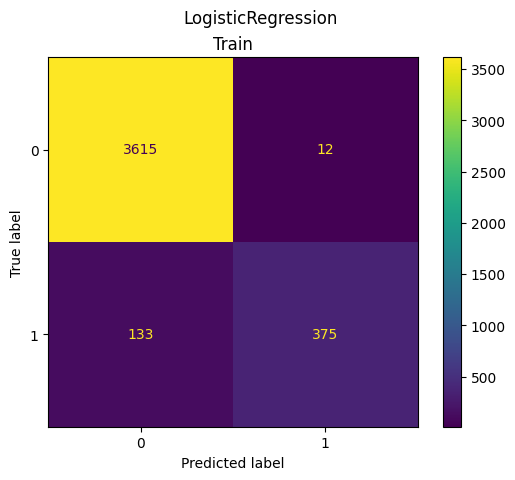

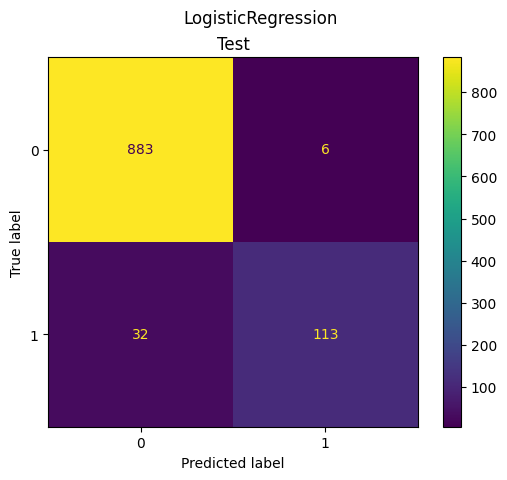

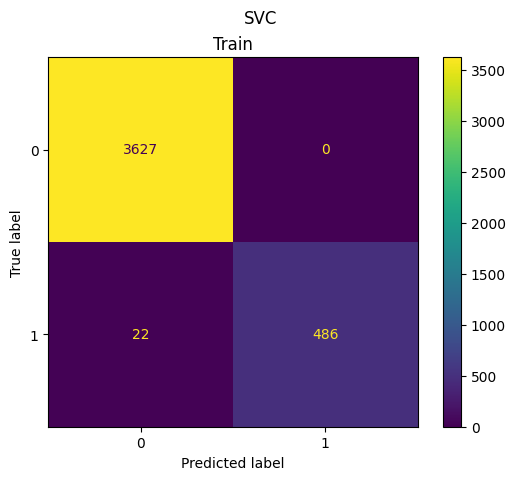

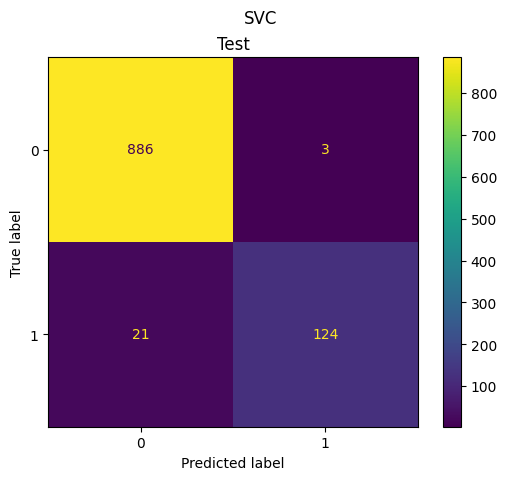

In [81]:
def plot_confusion_matrix():
    for i in range(len(model_list)):
        train_ConfusionMatrix = confusion_matrix(y_train,y_train_pred[i])
        test_ConfusionMatrix = confusion_matrix(y_test,y_test_pred[i])
        train_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = train_ConfusionMatrix, display_labels=[0,1])
        test_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_ConfusionMatrix, display_labels=[0,1])

        train_cm_display.plot()
        plt.title('Train')
        plt.suptitle(model_list[i])
        
        test_cm_display.plot()
        plt.title('Test')
        plt.suptitle(model_list[i])
        
        plt.show()

plot_confusion_matrix()

In [82]:
def models_accuracy():
    print('Accuracy of the models :')
    for i in range(len(model_list)):
        print(model_list[i], ' : Train Accuracy = ', accuracy_score(y_train,y_train_pred[i]), ', Test Accuracy = ', accuracy_score(y_test,y_test_pred[i]))

models_accuracy()

Accuracy of the models :
LogisticRegression  : Train Accuracy =  0.9649334945586457 , Test Accuracy =  0.9632495164410058
SVC  : Train Accuracy =  0.9946795646916566 , Test Accuracy =  0.97678916827853
